In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 05.1

In this exercise it was asked to evaluate the mean value of the radius of the orbital $1s$ and $2p$ for a Hydrogen atom. 

To do so it was necessary to calculate the following integral:
$$\left\langle r \right\rangle_{\Psi_{n,l,m}} = \int r \ |\Psi_{n,l,m}(r, \theta, \phi)|^2 \ d \vec x $$
This can be done by sampling the two probability distribution $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ by using the Metropolis algorithm. The transition matrix $T(\vec{x}|\vec{y})$ was, in one case, uniform and, in the other case, gaussian for each coordinate. It is importante to choose the amplitude of the uniform intervall ($\delta$) and of the Gaussian ($\sigma$) so that the acception rate of the Metropolis algorithm is about $50$%. After a number of tries I found that, for the ground state, the right values for $\delta$ and $\sigma$ are $1.25$ and $0.75$ and, for the excited state, $3$ and $1.85$, respectively.

Before computing the mean value of $r$, I equilibrated the sampling by taking $M_{equ}=10^3$ initial steps. 

For $1s$ orbital the origin is already a good starting point as we can see from the following plot. The mean value is already about $1.5$ ($a_0$). This is because $|\Psi_{1,0,0}(x,y,z)|^2$ corresponds to a distribution with spherical simmetry around the origin of the reference axis.

The $2p$ orbital with quantum numbers $n=2, \ l=1, \ m=0$ shows two regions simmetric to the plan $xy$. If we set $x_{0}=0$ and $y_{0}=0$ these symmetries are still conserved. If we take also $z_0 = 0$ the average value for $r$ taking these starting coordinates is good (about $5.3$). Although, it can be wise to start from a $z_0$ point where the probability density is higher. By looking at the scatterplot this can be satisfied if $z_0$ is equal to $4/5$ or the negative equivalent. I chose $z_0=4$ which, in the equilibration (see the plot), gave $5.1$ as the average value of $r$.

Text(0.5, 1.0, '$r_{\\Psi_{2,1,0}}$')

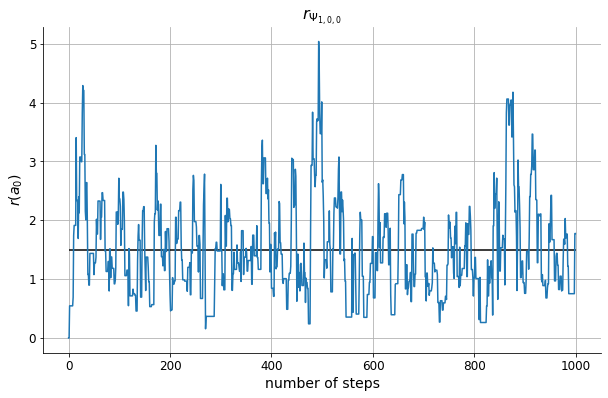

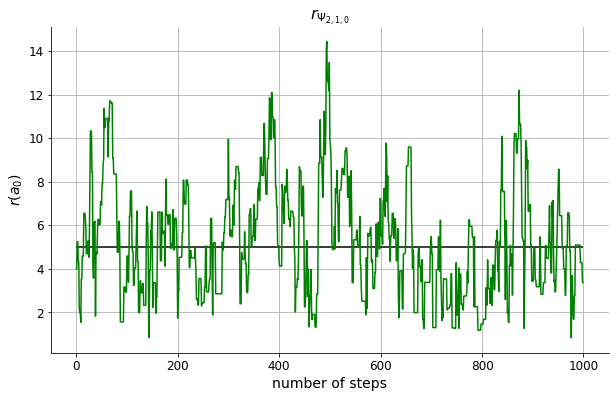

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x, f = np.loadtxt("risultati/equilibration_r0.dat", usecols=(0,1), unpack='true')
ax.plot(x,f)
ax.set_xlabel(r"number of steps")
ax.hlines(1.5,0,1000)
ax.set_ylabel(r"$r(a_0)$")
ax.grid(True)
ax.set_title(r"$r_{\Psi_{1,0,0}}$")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x, f = np.loadtxt("risultati/equilibration_r1.dat", usecols=(0,1), unpack='true')
ax.plot(x,f, color='green')
ax.set_xlabel(r"number of steps")
ax.hlines(5,0,1000)
ax.set_ylabel(r"$r(a_0)$")
ax.grid(True)
ax.set_title(r"$r_{\Psi_{2,1,0}}$")


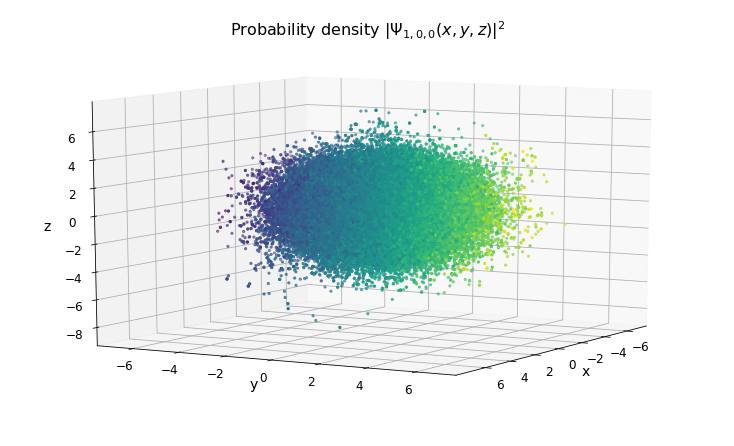

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
X, Y, Z = np.loadtxt("risultati/ProbDensity_unif_0.xyz", usecols=(0,1,2), unpack='true')

ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Y, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r"Probability density $|\Psi_{1,0,0}(x,y,z)|^2$")
ax.view_init(10, 30)
plt.show()

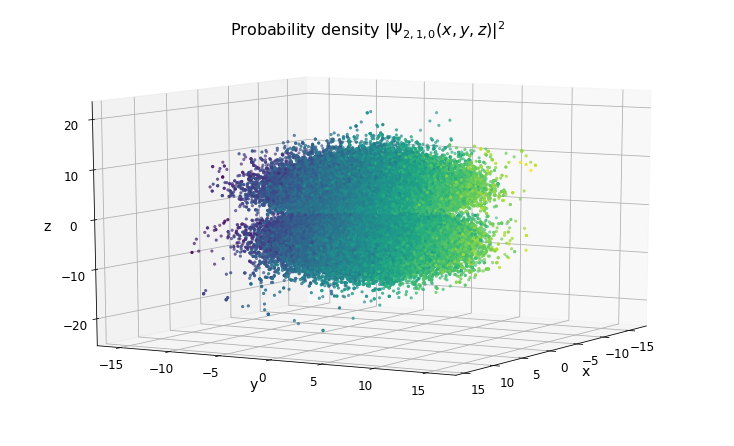

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
X, Y, Z = np.loadtxt("risultati/ProbDensity_unif_1.xyz", usecols=(0,1,2), unpack='true')

ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Y, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r"Probability density $|\Psi_{2,1,0}(x,y,z)|^2$")
ax.view_init(10, 30)
plt.show()

After the equilibration, starting from the last coordinates of *config.final* I evaluated the average of $r$ and its uncertainties (via blocking method) with the two different probability density with a number of steps $M=10^6$. As for the number of blocks I used $100$ so that the numbers of steps per block was very high. This made the values in each block uncorrelated, so that the hypothesis of Central Limit Theorem were satisfied.

In the following plot it is shown the comparison between the $<r>_{\Psi_{1,0,0}}$ calculated using as the transition matrix a uniform distribution and a gaussian one. The two result are equivalent. The same can be said for the plot showing the values of $<r>_{\Psi_{2,1,0}}$ in the two cases.  

Text(0.5, 1.0, '$<r>_{\\Psi_{1,0,0}}$ with error bars')

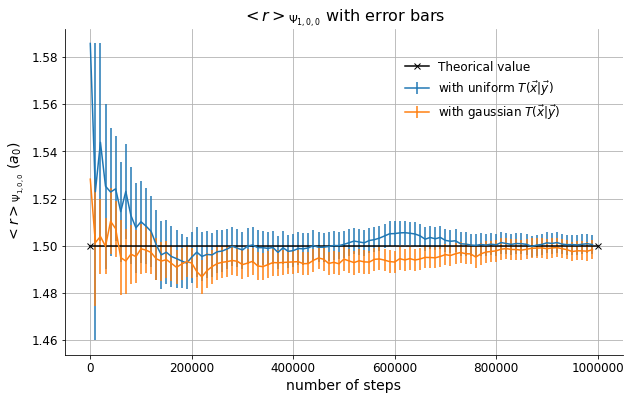

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x1, f1, error1 = np.loadtxt("risultati/r_unif_0.dat", usecols=(0,1,2), unpack='true') 
x2, f2, error2 = np.loadtxt("risultati/r_gauss_0.dat", usecols=(0,1,2), unpack='true') 
ax.errorbar(x1,f1,yerr=error1, label = r"with uniform $T(\vec{x}|\vec{y})$")
ax.errorbar(x2,f2,yerr=error2, label = r"with gaussian $T(\vec{x}|\vec{y})$")
ax.plot([0,1000000],[1.5,1.5], marker = "x", color = "black", label = "Theorical value")
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$<r>_{\Psi_{1,0,0}}$ $(a_0)$")
ax.grid(True)
ax.legend(loc=(0.6, 0.7), frameon=False)
ax.set_title(r"$<r>_{\Psi_{1,0,0}}$ with error bars")

Text(0.5, 1.0, '$<r>_{\\Psi_{2,1,0}}$ with error bars')

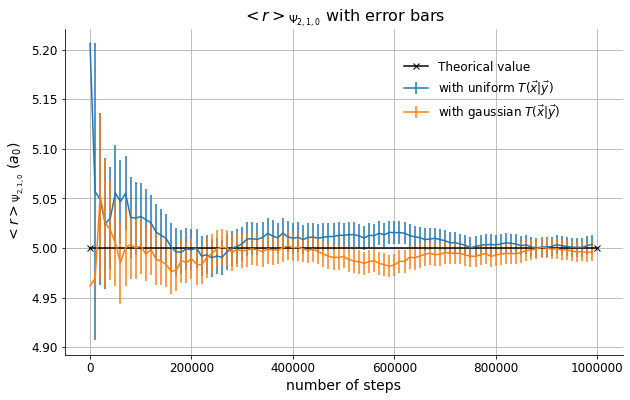

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x1, f1, error1 = np.loadtxt("risultati/r_unif_1.dat", usecols=(0,1,2), unpack='true') 
x2, f2, error2 = np.loadtxt("risultati/r_gauss_1.dat", usecols=(0,1,2), unpack='true') 
ax.errorbar(x1,f1,yerr=error1, label = r"with uniform $T(\vec{x}|\vec{y})$")
ax.errorbar(x2,f2,yerr=error2, label = r"with gaussian $T(\vec{x}|\vec{y})$")
ax.plot([0,1000000],[5,5], marker = "x", color = "black", label = "Theorical value")
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$<r>_{\Psi_{2,1,0}}$ $(a_0)$")
ax.grid(True)
ax.legend(loc=(0.6, 0.7), frameon=False)
ax.set_title(r"$<r>_{\Psi_{2,1,0}}$ with error bars")